Lucas Da Fonseca Costa rm560575

In [1]:
import pandas as pd
df = pd.read_csv('seeds_dataset.txt', sep="\t")
df.columns = ['area', 'perimetro', 'compacidade', 'comprimento_nucleo', 'largura_nucleo', 'coeficiente_assimetria', 'comprimento_sulco_nucleo', 'variedade']
df.head()

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco_nucleo,variedade
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


<Axes: >

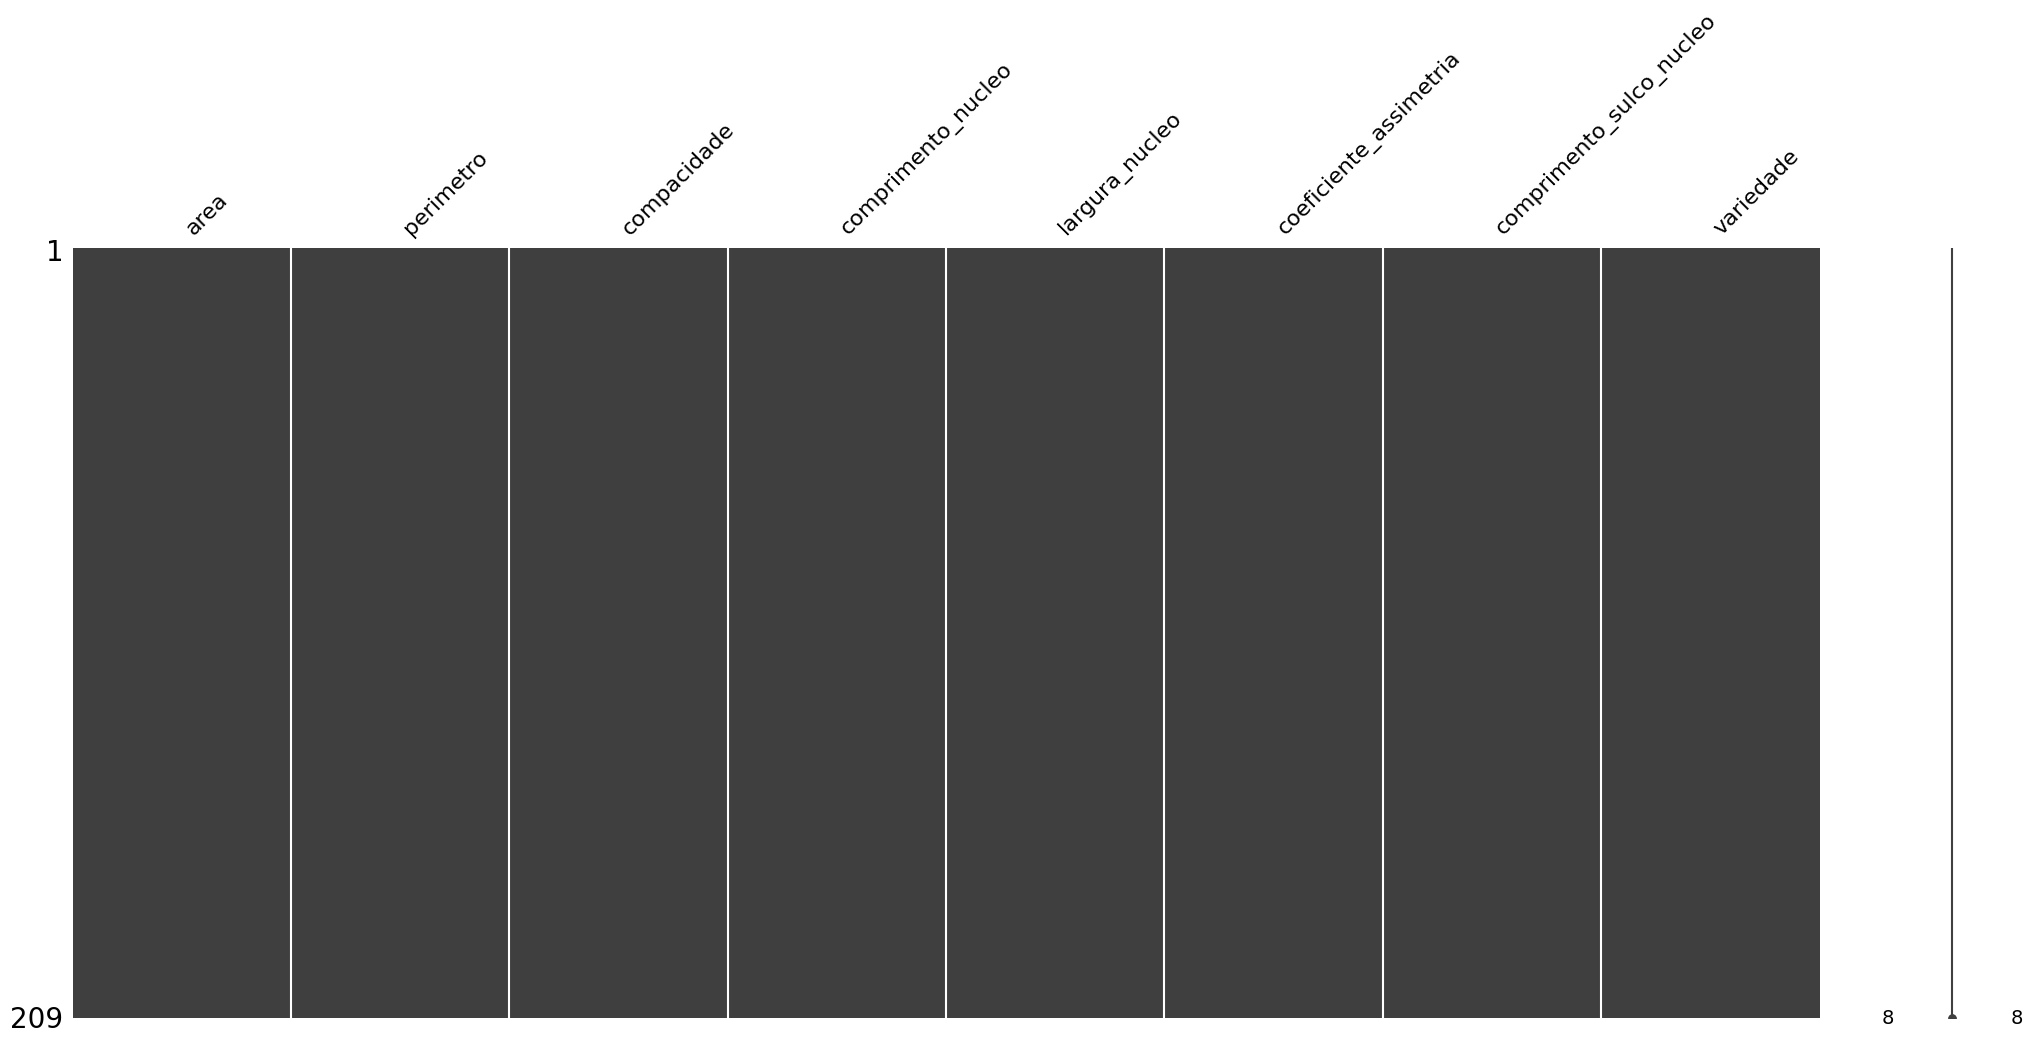

In [2]:
import missingno as msno
msno.matrix(df)

In [3]:
column_means = df.iloc[:, :-1].mean()
print(column_means)

area                        14.845550
perimetro                   14.557943
compacidade                  0.870999
comprimento_nucleo           5.627890
largura_nucleo               3.258349
coeficiente_assimetria       3.707278
comprimento_sulco_nucleo     5.408971
dtype: float64


In [4]:
column_median = df.iloc[:, :-1].median()
print(column_median)

area                        14.3400
perimetro                   14.2900
compacidade                  0.8735
comprimento_nucleo           5.5200
largura_nucleo               3.2320
coeficiente_assimetria       3.6000
comprimento_sulco_nucleo     5.2240
dtype: float64


In [5]:
column_std = df.iloc[:, :-1].std()
print(column_std)

area                        2.916545
perimetro                   1.308949
compacidade                 0.023686
comprimento_nucleo          0.444029
largura_nucleo              0.378603
coeficiente_assimetria      1.503657
comprimento_sulco_nucleo    0.492487
dtype: float64


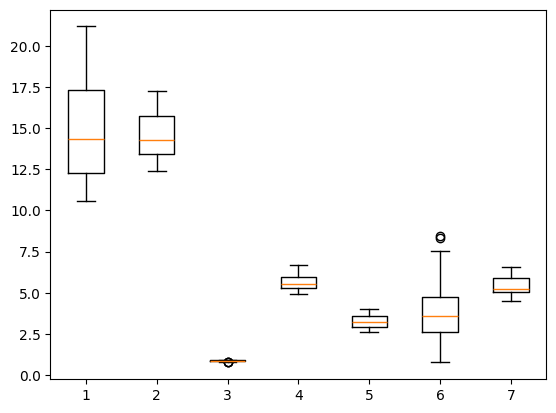

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df.iloc[:, :-1])
plt.show()

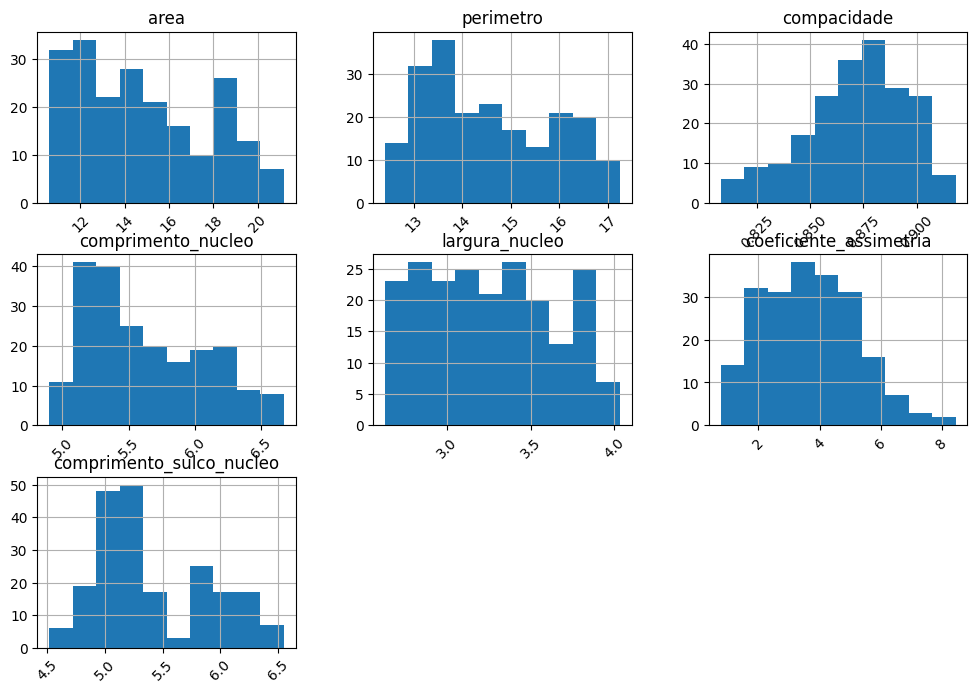

In [7]:
df.iloc[:, :-1].hist(bins=10, figsize=(12, 8), xrot=45)
plt.tight_layout
plt.show()

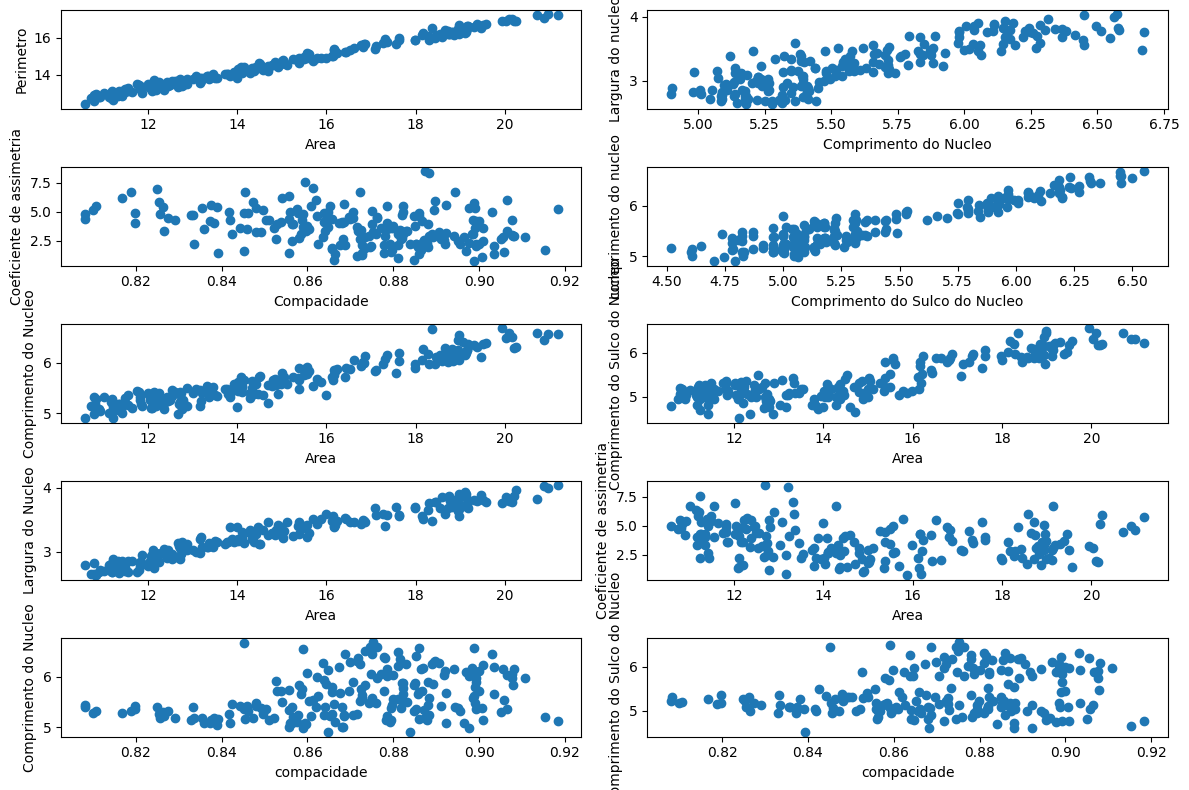

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))
axes[0, 0].scatter(df['area'], df['perimetro'])
axes[0, 0].set_xlabel('Area')
axes[0, 0].set_ylabel('Perimetro')


axes[0, 1].scatter(df['comprimento_nucleo'], df['largura_nucleo'])
axes[0, 1].set_xlabel('Comprimento do Nucleo')
axes[0, 1].set_ylabel('Largura do nucleo')


axes[1, 0].scatter(df['compacidade'], df['coeficiente_assimetria'])
axes[1, 0].set_xlabel('Compacidade')
axes[1, 0].set_ylabel('Coeficiente de assimetria')


axes[1, 1].scatter(df['comprimento_sulco_nucleo'], df['comprimento_nucleo'])
axes[1, 1].set_xlabel('Comprimento do Sulco do Nucleo')
axes[1, 1].set_ylabel('comprimento do nucleo')

axes[2,0].scatter(df['area'], df['comprimento_nucleo'])
axes[2,0].set_xlabel('Area')
axes[2,0].set_ylabel('Comprimento do Nucleo')


axes[2,1].scatter(df['area'], df['comprimento_sulco_nucleo'])
axes[2,1].set_xlabel('Area')
axes[2,1].set_ylabel('Comprimento do Sulco do Nucleo')


axes[3,0].scatter(df['area'], df['largura_nucleo'])
axes[3,0].set_xlabel('Area')
axes[3,0].set_ylabel('Largura do Nucleo')


axes[3,1].scatter(df['area'], df['coeficiente_assimetria'])
axes[3,1].set_xlabel('Area')
axes[3,1].set_ylabel('Coeficiente de assimetria')

axes[4,0].scatter(df['compacidade'], df['comprimento_nucleo'])
axes[4,0].set_xlabel('compacidade')
axes[4,0].set_ylabel('Comprimento do Nucleo')

axes[4,1].scatter(df['compacidade'], df['comprimento_sulco_nucleo'])
axes[4,1].set_xlabel('compacidade')
axes[4,1].set_ylabel('Comprimento do Sulco do Nucleo')



plt.tight_layout()
plt.show()


Nos grafico acima podemos observar uma forte correlação da area com a largura do nucleo, comprimento do nucleo e com o perimetro, tem uma baixa correlação com o comprimento do sulco do nucleo, e por fim não possui uma correlação com o coeficiente de assimetria, já a compacidade não possuio uma correlação com o comprimetno do sulco do nucleo, coeficiente de assimetria e com o comprimento do nucleo

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('variedade', axis=1)
y = df['variedade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df.head()

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco_nucleo,variedade
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
# Aplicando StandardScaler
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)
# Aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
# Mostrando as primeiras linhas dos dados escalados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()
df_minmax = pd.DataFrame(X_minmax_scaled, columns=X.columns)
df_minmax.head()

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco_nucleo
0,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
1,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
2,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
3,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
4,0.357885,0.371901,0.789474,0.274212,0.486101,0.220637,0.215165


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

# Testando diferentes algoritmos de classificação
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
accuracy_rf = model_rf.score(X_test, y_test)
print(f"Acurácia com Random Forest: {accuracy_rf:.2f}")
# SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)
print(f"Acurácia com SVM: {accuracy_svm:.2f}")
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
accuracy_knn = model_knn.score(X_test, y_test)
print(f"Acurácia com KNN: {accuracy_knn:.2f}")

#modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
accuracy_nb = model_nb.score(X_test, y_test)
print(f"Acurácia com Naive Bayes: {accuracy_nb:.2f}")

#modelo de Regressão Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print(f"Acurácia com Regressão Logística: {accuracy_lr:.2f}")

Acurácia com Random Forest: 0.90
Acurácia com SVM: 0.87
Acurácia com KNN: 0.87
Acurácia com Naive Bayes: 0.90
Acurácia com Regressão Logística: 0.90


In [12]:
# Importando todas as métricas necessárias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculando e exibindo a Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
# Calculando e exibindo a Precisão
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precisão (Weighted): {precision:.2f}")
# Calculando e exibindo o Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall (Weighted): {recall:.2f}")
# Calculando e exibindo o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (Weighted): {f1:.2f}")
# Calculando e exibindo a Matriz de Confusão
matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matrix)

Acurácia: 0.87
Precisão (Weighted): 0.87
Recall (Weighted): 0.87
F1-Score (Weighted): 0.87
Matriz de Confusão:
[[14  1  4]
 [ 1 20  0]
 [ 2  0 21]]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 0.41
Raiz do Erro Quadrático Médio (RMSE): 0.64
Média do Erro Absoluto (MAE): 0.22
Erro Percentual Médio Absoluto (MAPE): 0.17
Coeficiente de Determinação (R²): 0.38


Podemos observar com as metricas acima que não precisou otimizar os modelos tendo em vista que a acuracia dos modelos foram de 87% com SVM e KNN e de 90% com Regressão, Random forest e Naive Bayes, e que a arvore de decisão teeve poucos erros, sendo o maior erro na primeira variedade que o modelo se confundia com a terceira variedade